In [1]:
import sympy as sp
from sympy.physics.quantum import Bra, Ket
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.gate import HadamardGate,CNotGate, IdentityGate
from sympy.physics.quantum.qapply import qapply
from sympy import eye

from sympy.physics.quantum import Ket
from sympy import sqrt
from UnitaryFunction import buildUnitaryMatrix, format_matrice
sp.init_printing()

In [2]:
#definition des états
ket0 = Matrix([1,0])
ket1 = Matrix([0,1])
plus = Matrix([1/sqrt(2),1/sqrt(2)])
minus = Matrix([1/sqrt(2),-1/sqrt(2)])

α = sp.Symbol("α")
β = sp.Symbol("β")
ϕ = α * ket0 + β * ket1 # Matrix([α,β])


In [26]:
I=sp.eye(2)
π=sp.pi
i=sp.I
X=sp.Matrix([[0,1], [1,0]]) #Pauli
σx=X
Y=sp.Matrix([[0,-i], [i,0]])
Z=sp.Matrix([[1,0], [0,-1]])

H=sp.Matrix([[1/sp.sqrt(2),1/sp.sqrt(2)], [1/sp.sqrt(2),-1/sp.sqrt(2)]])

S=sp.Matrix([[1,0], [0,-i]])
T=sp.Matrix([[1,0], [0,sp.exp(-i*π/4)]])


# rotation by theta around y
def Ry(θ):
    return sp.Matrix([[sp.cos(θ/2),sp.sin(θ/2)], [-sp.sin(θ/2),sp.cos(θ/2)]])

# rotation by alpha around z
def Rz(α):
    return sp.Matrix([[sp.exp(i*α/2),0], [0,sp.exp(-i*α/2)]]) 

# Phase Shift with resepct to delta
def Ph(δ):
    return sp.Matrix([[sp.exp(i*δ),0], [0,sp.exp(i*δ)]]) 

# Operation on two Qubits

SWAP = sp.Matrix ([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
CNOT = TensorProduct(I,ket0*ket0.T) + TensorProduct(X, ket1*ket1.T) # second qubit is the control

In [27]:
# toffoliGate = TensorProduct(ket0*ket0.T,I,I) +TensorProduct(ket1*ket1.T,TensorProduct(ket0*ket0.T,I) + TensorProduct(ket1*ket1.T,X))
# toffoliGate

In [28]:
# Uf_00=TensorProduct(I,I,ket1*ket1.T) + TensorProduct(tmp,ket0*ket0.T)
def f00(a,b): 
    return not a  and not b
Uf_00 = buildUnitaryMatrix(f00)
print(format_matrice(Uf_00))

Uf_00 =
0, 0, 0, 0, 1, 0, 0, 0,
0, 1, 0, 0, 0, 0, 0, 0,
0, 0, 1, 0, 0, 0, 0, 0,
0, 0, 0, 1, 0, 0, 0, 0,
1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 1, 0, 0,
0, 0, 0, 0, 0, 0, 1, 0,
0, 0, 0, 0, 0, 0, 0, 1


In [32]:
# Uf_01=TensorProduct(I,I,ket0*ket0.T) + TensorProduct(TensorProduct(I,ket1*ket1.T)+TensorProduct(X,ket0*ket0.T),ket1*ket1.T)
def f01(a,b): 
    return not a  and b
Uf_01 = buildUnitaryMatrix(f01)
print(format_matrice(Uf_01))

Uf_01 =
1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 1, 0, 0,
0, 0, 1, 0, 0, 0, 0, 0,
0, 0, 0, 1, 0, 0, 0, 0,
0, 0, 0, 0, 1, 0, 0, 0,
0, 1, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 1, 0,
0, 0, 0, 0, 0, 0, 0, 1


In [33]:
#Uf_10=TensorProduct(I,I,ket1*ket1.T) + TensorProduct(TensorProduct(I,ket0*ket0.T)+TensorProduct(X,ket1*ket1.T),ket0*ket0.T)
def f10(a,b): 
    return a  and not b
Uf_10= buildUnitaryMatrix(f10)
print(format_matrice(Uf_10))

Uf_10 =
1, 0, 0, 0, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 1, 0,
0, 0, 0, 1, 0, 0, 0, 0,
0, 0, 0, 0, 1, 0, 0, 0,
0, 0, 0, 0, 0, 1, 0, 0,
0, 0, 1, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 1


In [35]:
# Uf_11 = TensorProduct(I,I,ket0*ket0.T) + TensorProduct(TensorProduct(I,ket0*ket0.T)+TensorProduct(X,ket1*ket1.T),ket1*ket1.T)
def f11(a,b): 
    return a and b
Uf_11= buildUnitaryMatrix(f11)
print(format_matrice(Uf_11))

Uf_11 =
1, 0, 0, 0, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0, 0, 0,
0, 0, 1, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 1,
0, 0, 0, 0, 1, 0, 0, 0,
0, 0, 0, 0, 0, 1, 0, 0,
0, 0, 0, 0, 0, 0, 1, 0,
0, 0, 0, 1, 0, 0, 0, 0


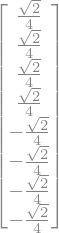

In [36]:
TensorProduct(H*ket1,H*ket0,H*ket0)


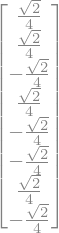

In [37]:
Uf_10*TensorProduct(H*ket1,H*ket0,H*ket0)

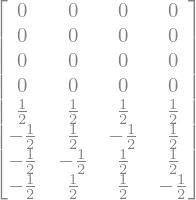

In [40]:
V=Matrix([
    Matrix([TensorProduct(H,H,H)*Uf_00*TensorProduct(H*ket1,H*ket0,H*ket0)]).T,
    Matrix([TensorProduct(H,H,H)*Uf_01*TensorProduct(H*ket1,H*ket0,H*ket0)]).T,
    Matrix([TensorProduct(H,H,H)*Uf_10*TensorProduct(H*ket1,H*ket0,H*ket0)]).T,
    Matrix([TensorProduct(H,H,H)*Uf_11*TensorProduct(H*ket1,H*ket0,H*ket0)]).T,
]).T
V

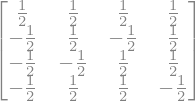

In [43]:
M=sp.Matrix([[ 1, 0, 0, 0, 1, 0, 0, 0],
        [ 0, 1, 0, 0, 0, 1, 0, 0],
        [ 0, 0, 1, 0, 0, 0, 1, 0],
        [ 0, 0, 0, 1, 0, 0, 0, 1]])*V
M

In [45]:
R=M.inv()
print(format_matrice(R))

R =
1/2, -1/2, -1/2, -1/2,
1/2, 1/2, -1/2, 1/2,
1/2, -1/2, 1/2, 1/2,
1/2, 1/2, 1/2, -1/2


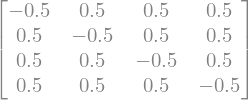

In [12]:
U = (1/2)*Matrix([
    [-1, 1, 1, 1], 
    [1, -1, 1, 1], 
    [1, 1, -1, 1], 
    [1, 1, 1, -1]
])
U

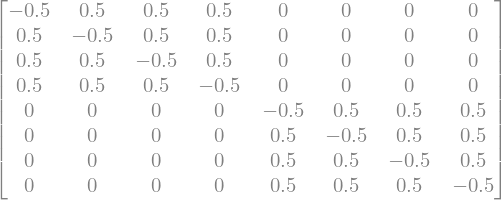

In [13]:
A = TensorProduct (I, U)
A

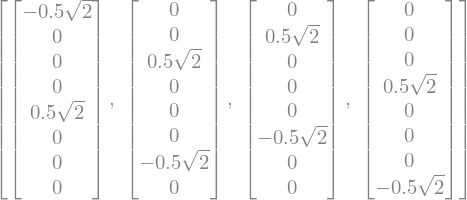

In [14]:
[A*TensorProduct(I,H,H)*Uf_00*TensorProduct(H*ket1,H*ket0,H*ket0),
 A*TensorProduct(I,H,H)*Uf_01*TensorProduct(H*ket1,H*ket0,H*ket0),
 A*TensorProduct(I,H,H)*Uf_10*TensorProduct(H*ket1,H*ket0,H*ket0),
 A*TensorProduct(I,H,H)*Uf_11*TensorProduct(H*ket1,H*ket0,H*ket0),
]


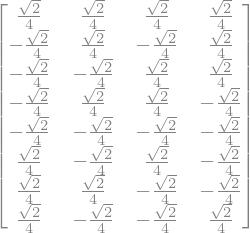

In [15]:
V=Matrix([
    Matrix([TensorProduct(I,H,H)*Uf_00*TensorProduct(H*ket1,H*ket0,H*ket0)]).T,
    Matrix([TensorProduct(I,H,H)*Uf_01*TensorProduct(H*ket1,H*ket0,H*ket0)]).T,
    Matrix([TensorProduct(I,H,H)*Uf_10*TensorProduct(H*ket1,H*ket0,H*ket0)]).T,
    Matrix([TensorProduct(I,H,H)*Uf_11*TensorProduct(H*ket1,H*ket0,H*ket0)]).T,
]).T
V

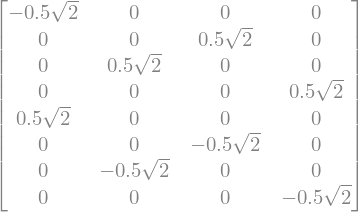

In [16]:
R=Matrix([
    Matrix([A*TensorProduct(I,H,H)*Uf_00*TensorProduct(H*ket1,H*ket0,H*ket0)]).T,
    Matrix([A*TensorProduct(I,H,H)*Uf_01*TensorProduct(H*ket1,H*ket0,H*ket0)]).T,
    Matrix([A*TensorProduct(I,H,H)*Uf_10*TensorProduct(H*ket1,H*ket0,H*ket0)]).T,
    Matrix([A*TensorProduct(I,H,H)*Uf_11*TensorProduct(H*ket1,H*ket0,H*ket0)]).T,
]).T
R

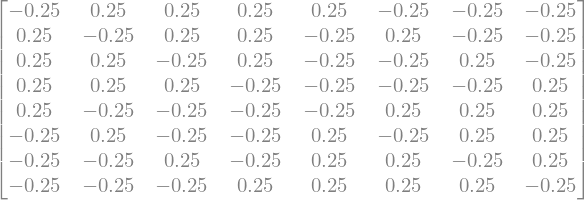

In [17]:
R*V.pinv()

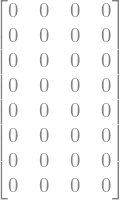

In [18]:
A*V-R

In [19]:
print (R*V.pinv())

Matrix([[-0.250000000000000, 0.250000000000000, 0.250000000000000, 0.250000000000000, 0.250000000000000, -0.250000000000000, -0.250000000000000, -0.250000000000000], [0.250000000000000, -0.250000000000000, 0.250000000000000, 0.250000000000000, -0.250000000000000, 0.250000000000000, -0.250000000000000, -0.250000000000000], [0.250000000000000, 0.250000000000000, -0.250000000000000, 0.250000000000000, -0.250000000000000, -0.250000000000000, 0.250000000000000, -0.250000000000000], [0.250000000000000, 0.250000000000000, 0.250000000000000, -0.250000000000000, -0.250000000000000, -0.250000000000000, -0.250000000000000, 0.250000000000000], [0.250000000000000, -0.250000000000000, -0.250000000000000, -0.250000000000000, -0.250000000000000, 0.250000000000000, 0.250000000000000, 0.250000000000000], [-0.250000000000000, 0.250000000000000, -0.250000000000000, -0.250000000000000, 0.250000000000000, -0.250000000000000, 0.250000000000000, 0.250000000000000], [-0.250000000000000, -0.250000000000000, 0.2

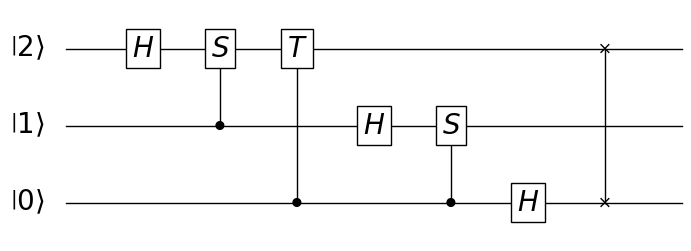

In [57]:
from sympy.physics.quantum.circuitplot import CircuitPlot
from sympy.physics.quantum.gate import CNOT, H, SWAP, CGate, S, T
from sympy.physics.quantum.circuitplot import labeller
c = CircuitPlot(SWAP(0,2)*\
                H(0)*\
                CGate((0,),S(1)) *\
                H(1)*\
                CGate((0,),T(2))*\
                CGate((1,),S(2))*\
                H(2),
                3,
                labels=['0', '1', '2'])

In [59]:
from sympy.physics.quantum import qapply, Dagger
from sympy.physics.quantum.qubit import Qubit
from sympy.physics.quantum.gate import H
from sympy.physics.quantum.circuitplot import CircuitPlot

# Définition du nombre de qubits
n_qubits = 3  # Vous pouvez ajuster ce nombre

# Création du circuit avec des portes de Hadamard en parallèle
gates = [H(i) for i in range(n_qubits)]

# Affichage du circuit
CircuitPlot(gates, nqubits=n_qubits).show()

AttributeError: 'list' object has no attribute 'args'

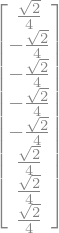

In [20]:
# TensorProduct(minus, 
TensorProduct(I,H,H)*Uf_00*TensorProduct(H*ket1,H*ket0,H*ket0)

# Kraus-Cirac decomposition


$$
fd = -1\times\vert0\rangle\langle0\vert + \vert0\rangle\langle1\vert + \vert1\rangle\langle0\vert - 1\times \vert1\rangle\langle1\vert
$$

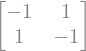

In [21]:
fd = -1*ket0*ket0.T+1*ket0*ket1.T+1*ket1*ket0.T-1*ket1*ket1.T
fd

$$
I \oplus fd
$$

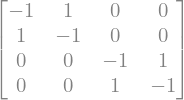

In [22]:
TensorProduct(I,fd)

$$
sd = \vert0\rangle\langle0\vert + \vert0\rangle\langle1\vert + \vert1\rangle\langle0\vert + \vert1\rangle\langle1\vert
$$

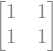

In [23]:
sd = 1*ket0*ket0.T+1*ket0*ket1.T+1*ket1*ket0.T+1*ket1*ket1.T
sd

$$
NOT \oplus sd
$$

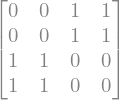

In [24]:
TensorProduct(X,sd)

$$
U = \frac{1}{2}*(I \oplus fd + NOT \oplus sd)
$$

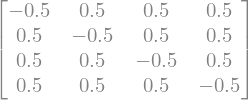

In [25]:
(1/2)*(TensorProduct(I,fd) + TensorProduct(X,sd))

In [26]:
def Controlled(U):
    return TensorProduct(ket0*ket0.T, I) + TensorProduct(ket1*ket1.T, U)

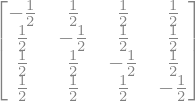

In [27]:

TensorProduct(H,I)*Controlled(X)*TensorProduct(H,I)*TensorProduct(X,X)

Et voici la [solution dans Quirk](https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22~gnbm%22],[%22H%22,%22H%22],[%22H%22],[%22%E2%80%A2%22,%22X%22],[%22H%22],[%22X%22,%22X%22]],%22gates%22:[{%22id%22:%22~diut%22,%22name%22:%22F00C%22,%22circuit%22:{%22cols%22:[[%22%E2%97%A6%22,%22%E2%97%A6%22,%22X%22]]}},{%22id%22:%22~7gpq%22,%22name%22:%22F01C%22,%22circuit%22:{%22cols%22:[[%22%E2%80%A2%22,%22%E2%97%A6%22,%22X%22]]}},{%22id%22:%22~gnbm%22,%22name%22:%22F10C%22,%22circuit%22:{%22cols%22:[[%22%E2%97%A6%22,%22%E2%80%A2%22,%22X%22]]}},{%22id%22:%22~6r1f%22,%22name%22:%22F11C%22,%22circuit%22:{%22cols%22:[[%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22]]}},{%22id%22:%22~niml%22,%22name%22:%22F00M%22,%22matrix%22:%22{{0,0,0,0,1,0,0,0},{0,1,0,0,0,0,0,0},{0,0,1,0,0,0,0,0},{0,0,0,1,0,0,0,0},{1,0,0,0,0,0,0,0},{0,0,0,0,0,1,0,0},{0,0,0,0,0,0,1,0},{0,0,0,0,0,0,0,1}}%22},{%22id%22:%22~9sh2%22,%22name%22:%22F01M%22,%22matrix%22:%22{{1,0,0,0,0,0,0,0},{0,0,0,0,0,1,0,0},{0,0,1,0,0,0,0,0},{0,0,0,1,0,0,0,0},{0,0,0,0,1,0,0,0},{0,1,0,0,0,0,0,0},{0,0,0,0,0,0,1,0},{0,0,0,0,0,0,0,1}}%22},{%22id%22:%22~dogi%22,%22name%22:%22F10M%22,%22matrix%22:%22{{1,0,0,0,0,0,0,0},{0,1,0,0,0,0,0,0},{0,0,0,0,0,0,1,0},{0,0,0,1,0,0,0,0},{0,0,0,0,1,0,0,0},{0,0,0,0,0,1,0,0},{0,0,1,0,0,0,0,0},{0,0,0,0,0,0,0,1}}%22},{%22id%22:%22~viov%22,%22name%22:%22F11M%22,%22matrix%22:%22{{1,0,0,0,0,0,0,0},{0,1,0,0,0,0,0,0},{0,0,1,0,0,0,0,0},{0,0,0,0,0,0,0,1},{0,0,0,0,1,0,0,0},{0,0,0,0,0,1,0,0},{0,0,0,0,0,0,1,0},{0,0,0,1,0,0,0,0}}%22},{%22id%22:%22~5lr9%22,%22name%22:%22U%22,%22matrix%22:%22{{-%C2%BD,%C2%BD,%C2%BD,%C2%BD},{%C2%BD,-%C2%BD,%C2%BD,%C2%BD},{%C2%BD,%C2%BD,-%C2%BD,%C2%BD},{%C2%BD,%C2%BD,%C2%BD,-%C2%BD}}%22},{%22id%22:%22~rssu%22,%22name%22:%22myU%22,%22matrix%22:%22{{0.0826902,0.4760478,0.5266797,0.1419818,0.5826902,-0.0239522,0.0266797,-0.3580182},{0.1763118,-0.0221848,0.3215547,0.6830707,-0.3236882,0.4778152,-0.1784453,0.1830707},{0.1710094,-0.0559056,0.1280949,0.3350088,-0.3289906,-0.5559056,0.6280949,-0.1649912},{0.6072783,0.0188629,0.0907125,-0.0413008,0.1072783,-0.4811371,-0.4092875,0.4586992},{0.5826902,-0.0239522,0.0266797,-0.3580182,0.0826902,0.4760478,0.5266797,0.1419818},{-0.3236882,0.4778152,-0.1784453,0.1830707,0.1763118,-0.0221848,0.3215547,0.6830707},{-0.3289906,-0.5559056,0.6280949,-0.1649912,0.1710094,-0.0559056,0.1280949,0.3350088},{0.1072783,-0.4811371,-0.4092875,0.4586992,0.6072783,0.0188629,0.0907125,-0.0413008}}%22}],%22init%22:[0,0,1]})

In [28]:
α1 = sp.Symbol("α1", complex=True)
β1 = sp.Symbol("β1", complex=True)
ϕ1 = α1 * ket0 + β1 * ket1 # Matrix([α,β])

α2 = sp.Symbol("α2", complex=True)
β2 = sp.Symbol("β2", complex=True)
ϕ2 = α2 * ket0 + β2 * ket1 # Matrix([α,β])

α3 = sp.Symbol("α3", complex=True)
β3 = sp.Symbol("β3", complex=True)
ϕ3 = α3 * ket0 + β3 * ket1 # Matrix([α,β])


In [29]:

sp.simplify(TensorProduct(I,H,H)*Uf_01*TensorProduct(H,H,H)*TensorProduct(ϕ1, ϕ2, ϕ3))

⎡√2⋅(2⋅α₁⋅α₂⋅α₃ + α₂⋅α₃⋅β₁ + α₂⋅β₁⋅β₃ - α₃⋅β₁⋅β₂ + β₁⋅β₂⋅β₃)⎤
⎢───────────────────────────────────────────────────────────⎥
⎢                             4                             ⎥
⎢                                                           ⎥
⎢√2⋅(2⋅α₁⋅α₂⋅β₃ + α₂⋅α₃⋅β₁ + α₂⋅β₁⋅β₃ + α₃⋅β₁⋅β₂ - β₁⋅β₂⋅β₃)⎥
⎢───────────────────────────────────────────────────────────⎥
⎢                             4                             ⎥
⎢                                                           ⎥
⎢√2⋅(2⋅α₁⋅α₃⋅β₂ - α₂⋅α₃⋅β₁ + α₂⋅β₁⋅β₃ + α₃⋅β₁⋅β₂ + β₁⋅β₂⋅β₃)⎥
⎢───────────────────────────────────────────────────────────⎥
⎢                             4                             ⎥
⎢                                                           ⎥
⎢√2⋅(2⋅α₁⋅β₂⋅β₃ + α₂⋅α₃⋅β₁ - α₂⋅β₁⋅β₃ + α₃⋅β₁⋅β₂ + β₁⋅β₂⋅β₃)⎥
⎢───────────────────────────────────────────────────────────⎥
⎢                             4                             ⎥
⎢                                                           ⎥
⎢√2⋅(2⋅α

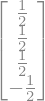

In [30]:
sp.Matrix([[ 1, 0, 0, 0, 1, 0, 0, 0],
        [ 0, 1, 0, 0, 0, 1, 0, 0],
        [ 0, 0, 1, 0, 0, 0, 1, 0],
        [ 0, 0, 0, 1, 0, 0, 0, 1]])*TensorProduct(H,H,H)*Uf_11*TensorProduct(H,H,H)*TensorProduct(ket1, ket0, ket0)

In [31]:
def buildUinput(Uf):
    return sp.Matrix([[ 1, 0, 0, 0, 1, 0, 0, 0],
        [ 0, 1, 0, 0, 0, 1, 0, 0],
        [ 0, 0, 1, 0, 0, 0, 1, 0],
        [ 0, 0, 0, 1, 0, 0, 0, 1]])*TensorProduct(H,H,H)*Uf*TensorProduct(H,H,H)*TensorProduct(ket1, ket0, ket0)
    

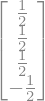

In [32]:
buildUinput(Uf_11)


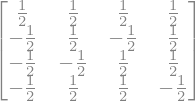

In [40]:
V=Matrix([
    Matrix(buildUinput(Uf_00)).T,
    Matrix(buildUinput(Uf_01)).T,
    Matrix(buildUinput(Uf_10)).T,
    Matrix(buildUinput(Uf_11)).T
       ]).T
V2=Matrix([
    Matrix(buildUinput(Uf_00)).T,
    Matrix(buildUinput(Uf_10)).T,
    Matrix(buildUinput(Uf_01)).T,
    Matrix(buildUinput(Uf_11)).T
       ]).T
V

In [41]:
V.inv()
print (V2.inv())
# 0.5, -0.5, -0.5, -0.5, 
# 0.5, 0.5, -0.5, 0.5,
# 0.5, -0.5, 0.5, 0.5,
# 0.5, 0.5, 0.5, -0.5

# 0.5, -0.5, -0.5, -0.5
# 0.5, -0.5, 0.5, 0.5
# 0.5, 0.5, -0.5, 0.5
# 0.5, 0.5, 0.5, -0.5

Matrix([[1/2, -1/2, -1/2, -1/2], [1/2, -1/2, 1/2, 1/2], [1/2, 1/2, -1/2, 1/2], [1/2, 1/2, 1/2, -1/2]])


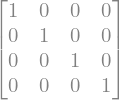

In [35]:
V.inv()*V


In [36]:
V.inv()*buildUinput(Uf_10)